In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import requests
import json
import time
from sklearn.preprocessing import OneHotEncoder

# Analise da atuação dos parlamentares da Câmara Federal

### Proposições dos legisladores - de 2002 a 2016

In [31]:
dfProposicoes = pd.read_csv('proposicoes.csv',  engine= 'python', error_bad_lines=False, warn_bad_lines=False, sep=';',dayfirst=True, parse_dates=[0])

In [32]:
dfProposicoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46362 entries, 0 to 46361
Data columns (total 66 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   DATAPRESENTACAOPROPOSICAO                46362 non-null  datetime64[ns]
 1   DATTRANSFPROPOSICAOLEI                   10040 non-null  object        
 2   COD_TIPO_PARLAMENTAR                     46362 non-null  int64         
 3   NOM_CIVIL_PARLAMENTAR                    33446 non-null  object        
 4   NOM_PARLAMENTAR                          33446 non-null  object        
 5   COD_SEXO                                 33446 non-null  object        
 6   DES_TIPO_PARLAMENTAR                     33446 non-null  object        
 7   COD_PARLAMENTAR_ORIGEM                   46362 non-null  int64         
 8   NUM_LEGISLATURA_APRESEN                  46362 non-null  int64         
 9   NUM_SESSAO_LEGISLATIVA_APRESEN         

In [33]:
dfProposicoes.head()

,DATAPRESENTACAOPROPOSICAO,DATTRANSFPROPOSICAOLEI,COD_TIPO_PARLAMENTAR,NOM_CIVIL_PARLAMENTAR,NOM_PARLAMENTAR,COD_SEXO,DES_TIPO_PARLAMENTAR,COD_PARLAMENTAR_ORIGEM,NUM_LEGISLATURA_APRESEN,NUM_SESSAO_LEGISLATIVA_APRESEN,...,NUM_LEGISLATURA_VET_TOTAL,NUM_SESSAO_LEGISLATIVA_VET_TOTAL,COD_TIPO_SESSAO_LEGISLATIVA_VET_TOTAL,DAT_INICIO_LEGISLATURA_VET_TOTAL,DAT_FIM_LEGISLATURA_VET_TOTAL,DAT_INICIO_SESSAO_LEGISLATIVA_VET_TOTAL,DAT_FIM_SESSAO_LEGISLATIVA_VET_TOTAL,DES_TIPO_SESSAO_LEGISLATIVA_VET_TOTAL,DAT_INICIAL_RECESSO_VET_TOTAL,DAT_FINAL_RECESSO_VET_TOTAL
0,2003-09-16,NaN,10000,RONALDO VASCONCELLOS NOVAIS,RONALDO VASCONCELLOS,M,DEPUTADO,521183,52,1.0,...,-1,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2003-09-09,02-01-2006,10000,LUIZ ROBERTO DE ALBUQUERQUE,BETO ALBUQUERQUE,M,DEPUTADO,523221,52,1.0,...,-1,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2003-06-03,NaN,10000,ELIMAR MÁXIMO DAMASCENO,ELIMAR MÁXIMO DAMASCENO,M,DEPUTADO,524137,52,1.0,...,-1,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2003-09-09,NaN,10000,CARLOS FREDERICO THEODORO NADER,CARLOS NADER,M,DEPUTADO,522538,52,1.0,...,-1,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2004-05-18,NaN,10000,CARLOS FREDERICO THEODORO NADER,CARLOS NADER,M,DEPUTADO,522538,52,2.0,...,-1,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
dfProposicoes.query('DATAPRESENTACAOPROPOSICAO >= "2010-01-01"')

,DATAPRESENTACAOPROPOSICAO,DATTRANSFPROPOSICAOLEI,COD_TIPO_PARLAMENTAR,NOM_CIVIL_PARLAMENTAR,NOM_PARLAMENTAR,COD_SEXO,DES_TIPO_PARLAMENTAR,COD_PARLAMENTAR_ORIGEM,NUM_LEGISLATURA_APRESEN,NUM_SESSAO_LEGISLATIVA_APRESEN,...,NUM_LEGISLATURA_VET_TOTAL,NUM_SESSAO_LEGISLATIVA_VET_TOTAL,COD_TIPO_SESSAO_LEGISLATIVA_VET_TOTAL,DAT_INICIO_LEGISLATURA_VET_TOTAL,DAT_FIM_LEGISLATURA_VET_TOTAL,DAT_INICIO_SESSAO_LEGISLATIVA_VET_TOTAL,DAT_FIM_SESSAO_LEGISLATIVA_VET_TOTAL,DES_TIPO_SESSAO_LEGISLATIVA_VET_TOTAL,DAT_INICIAL_RECESSO_VET_TOTAL,DAT_FINAL_RECESSO_VET_TOTAL
285,2011-09-28,NaN,10000,JOAQUIM BELTRÃO SIQUEIRA,JOAQUIM BELTRÃO,M,DEPUTADO,524585,54,1.0,...,-1,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
286,2011-09-29,NaN,10000,ALFREDO HELIO SYRKIS,ALFREDO SIRKIS,M,DEPUTADO,530143,54,1.0,...,-1,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
287,2011-09-21,NaN,10000,MARIA DALVA DE SOUZA FIGUEIREDO,DALVA FIGUEIREDO,F,DEPUTADO,524733,54,1.0,...,-1,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
288,2011-09-21,NaN,10000,OSMAR RIBEIRO DE ALMEIDA JÚNIOR,OSMAR JÚNIOR,M,DEPUTADO,526575,54,1.0,...,-1,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
289,2011-09-21,NaN,10000,ALEXANDRE RUBIO ROSO,ALEXANDRE ROSO,M,DEPUTADO,530165,54,1.0,...,-1,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46166,2011-12-06,NaN,10000,CARLOS HUMBERTO MANNATO,CARLOS MANATO,M,DEPUTADO,5310639,54,1.0,...,-1,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46167,2013-12-17,NaN,10000,FABIO DE ALMEIDA REIS,FABIO REIS,M,DEPUTADO,5310680,54,3.0,...,-1,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46168,2013-06-12,NaN,10000,JORGE WICKS CÔRTE REAL,JORGE CÔRTE REAL,M,DEPUTADO,5310621,54,3.0,...,-1,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46169,2014-10-13,NaN,10000,NELSON MARCHEZAN JÚNIOR,NELSON MARCHEZAN JUNIOR,M,DEPUTADO,5310428,54,4.0,...,-1,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
dfProposicoes.shape

(46362, 66)

### Total de projetos de lei apresentados por ano

In [36]:
dfProposicoes[['DATAPRESENTACAOPROPOSICAO']].groupby(dfProposicoes.ANO_PROPOSICAO).count()

,DATAPRESENTACAOPROPOSICAO
ANO_PROPOSICAO,
2002.0,3044
2003.0,4922
2004.0,2692
2005.0,2636
2006.0,2050
2007.0,3868
2008.0,3096
2009.0,3509
2010.0,2251


### Totais de projetos apresentados por deputado em ordem decrescente

In [37]:
dfProposicoes[['DATAPRESENTACAOPROPOSICAO']].groupby(dfProposicoes.NOM_PARLAMENTAR).count().sort_values(by='DATAPRESENTACAOPROPOSICAO', ascending=False).head(20)

,DATAPRESENTACAOPROPOSICAO
NOM_PARLAMENTAR,
CARLOS NADER,643
CARLOS BEZERRA,460
JOSÉ CARLOS COUTINHO,329
ANTONIO CARLOS MENDES THAME,314
POMPEO DE MATTOS,302
CARLOS SOUZA,275
ALBERTO FRAGA,272
CLEBER VERDE,265
SANDES JÚNIOR,201


### Totais de projetos apresentados por partido em ordem decrescente

In [38]:
dfProposicoes[['DATAPRESENTACAOPROPOSICAO']].groupby(dfProposicoes.SIG_PARTIDO_POLITICO).count().sort_values(by='DATAPRESENTACAOPROPOSICAO', ascending=False).head(20)

,DATAPRESENTACAOPROPOSICAO
SIG_PARTIDO_POLITICO,
PMDB,4637
PT,3999
PSDB,3422
PP,2308
PSB,1893
PDT,1807
PFL,1694
DEM,1599
PR,1588


### Proposições por área - classificação decrescente

In [41]:
areas = dfProposicoes[['DATAPRESENTACAOPROPOSICAO']].groupby(dfProposicoes.AREAS_TEMATICAS_APRESENTACAO).count()

In [42]:
areas.sort_values(by='DATAPRESENTACAOPROPOSICAO', ascending=False).head(20)

,DATAPRESENTACAOPROPOSICAO
AREAS_TEMATICAS_APRESENTACAO,
COMUNICAÇÕES,8463
TRABALHO E EMPREGO,2455
ADMINISTRAÇÃO PÚBLICA,2352
EDUCAÇÃO,2073
TRIBUTAÇÃO,2056
DIREITO PENAL E PROCESSUAL PENAL,1782
SAÚDE,1539
"DIREITOS HUMANOS, MINORIAS E CIDADANIA",1439
VIAÇÃO E TRANSPORTES,1359


<AxesSubplot:ylabel='Frequency'>

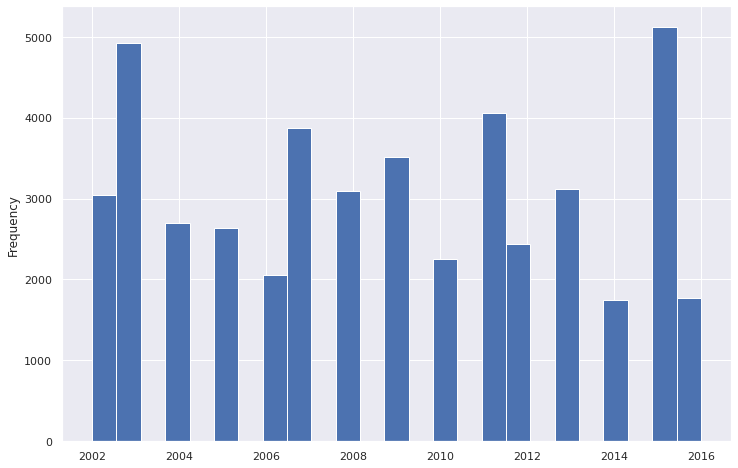

In [50]:
dfProposicoes.ANO_PROPOSICAO.plot(bins=25, kind='hist',figsize=(12, 8), )

In [84]:
dfProposicoesPartido = dfProposicoes.groupby('SIG_PARTIDO_POLITICO').count()
dfProposicoesEstado = dfProposicoes.groupby('SIG_UF').count()

Text(0.5, 1.0, 'Nº de proposições por partido')

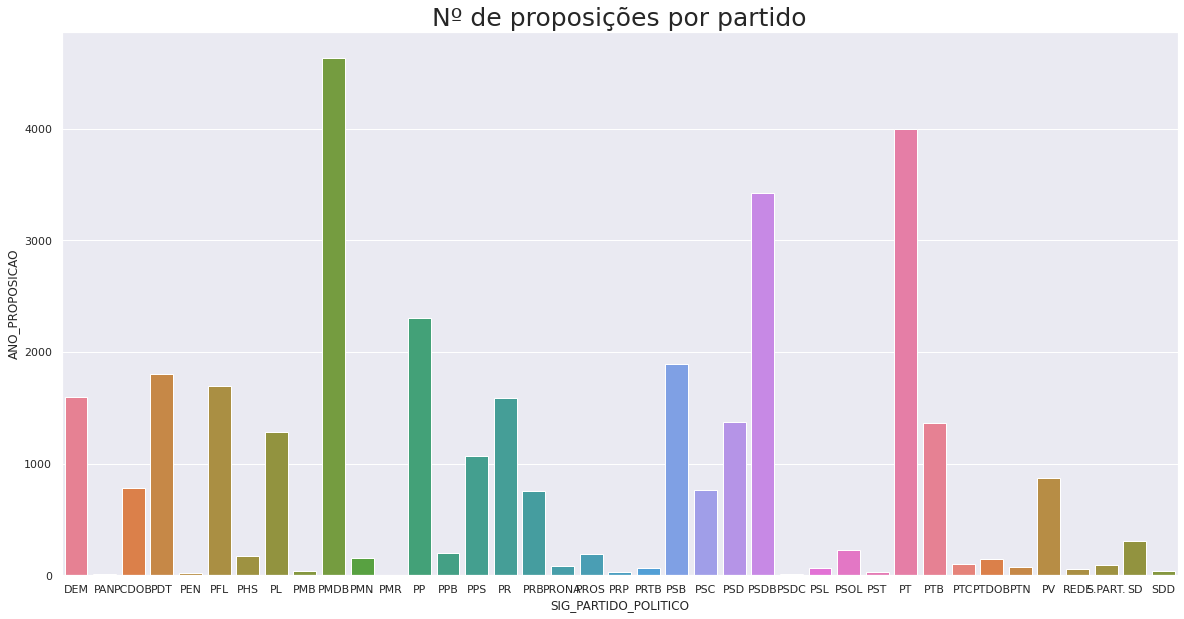

In [263]:
sns.set_style('darkgrid')
ax = sns.barplot(x=dfProposicoesPartido.index, y= dfProposicoesPartido.ANO_PROPOSICAO,
             palette=sns.color_palette(palette="husl", n_colors=30, desat=None))
ax.figure.set_size_inches(20, 10)
ax.set_title('Nº de proposições por partido', fontsize=25)

Text(0.5, 1.0, 'Nº de proposições por Estado da Federação')

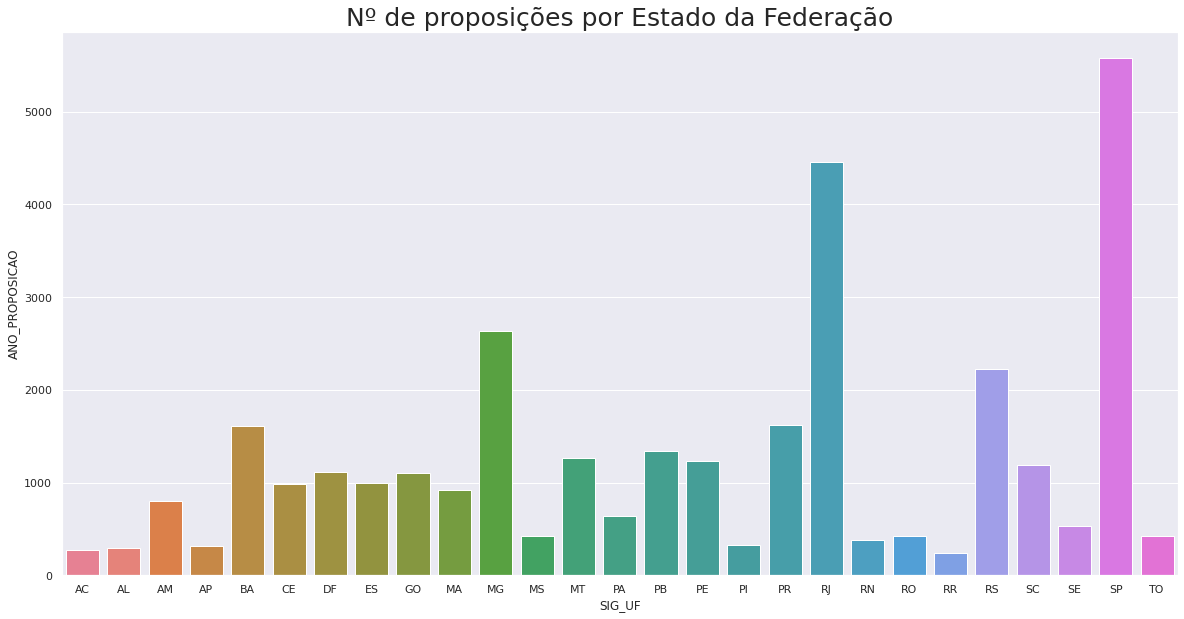

In [262]:
sns.set_style('darkgrid')
ax = sns.barplot(x=dfProposicoesEstado.index, y= dfProposicoesEstado.ANO_PROPOSICAO,
             palette=sns.color_palette(palette="husl", n_colors=30, desat=None))
ax.figure.set_size_inches(20, 10)
ax.set_title('Nº de proposições por Estado da Federação', fontsize=25)

## Novo dataframe - gastos dos deputados - cota parlamentar em 2020

In [130]:
dfGastosDep = pd.read_csv('Ano-2020.csv', engine='python', sep=';')

In [131]:
dfGastosDep.head()

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,...,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
0,LIDERANÇA DO DEMOCRATAS,NaN,NaN,NaN,2019,NaN,NaN,56,4,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",...,2020,0,NaN,NaN,1693866,NaN,NaN,2713,7050172,http://camara.leg.br/cota-parlamentar/nota-fis...
1,LIDERANÇA DO DEMOCRATAS,NaN,NaN,NaN,2019,NaN,NaN,56,4,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",...,2020,0,NaN,NaN,1698547,NaN,NaN,2713,7058437,http://camara.leg.br/cota-parlamentar/nota-fis...
2,LIDERANÇA DO DEMOCRATAS,NaN,NaN,NaN,2019,NaN,NaN,56,4,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",...,2020,0,NaN,NaN,1709149,NaN,NaN,2713,7078508,http://camara.leg.br/cota-parlamentar/nota-fis...
3,LIDERANÇA DO DEMOCRATAS,NaN,NaN,NaN,2019,NaN,NaN,56,4,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",...,2020,0,NaN,NaN,1730495,NaN,NaN,2713,7123566,http://camara.leg.br/cota-parlamentar/nota-fis...
4,LIDERANÇA DO DEMOCRATAS,NaN,NaN,NaN,2019,NaN,NaN,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,...,2020,0,NaN,NaN,1703569,NaN,NaN,2713,7067718,http://camara.leg.br/cota-parlamentar/nota-fis...


In [133]:
dfGastosDep.shape

(129341, 31)

### Comparando gastos totais por partido

In [138]:
partidos = dfGastosDep[['vlrDocumento']].groupby(dfGastosDep.sgPartido).sum().sort_values(by='vlrDocumento', ascending=False)
partidos

,vlrDocumento
sgPartido,
PT,15172269.42
PSL,12289241.58
PL,11042927.01
PP,10075777.17
MDB,9253448.58
PSD,9162202.81
REPUBLICANOS,9090565.54
PSDB,8480319.53
PDT,8244889.35


### Número de parlamentares por partido

In [139]:
deputados = dfGastosDep[['txNomeParlamentar']].groupby(dfGastosDep.sgPartido).nunique().sort_values(by='txNomeParlamentar', ascending=False)
deputados

,txNomeParlamentar
sgPartido,
PT,55
PSL,53
PL,43
PP,42
PSD,38
MDB,36
REPUBLICANOS,35
PSDB,34
PSB,32


### Gasto médio de deputados por partido - ordem decrescente

In [149]:
(partidos.vlrDocumento / deputados.txNomeParlamentar).round(2).sort_values(ascending=False)

sgPartido
PTB              298502.84
PDT              294460.33
PATRIOTA         281166.07
PT               275859.44
PSC              270792.48
PCdoB            269805.06
DEM              267000.24
REDE             262255.58
REPUBLICANOS     259730.44
MDB              257040.24
PL               256812.26
SOLIDARIEDADE    251640.91
PSDB             249421.16
PSD              241110.60
PP               239899.46
PSL              231872.48
PODE             218309.82
PROS             216532.44
AVANTE           213173.16
PSOL             206393.60
PSB              205889.60
CIDADANIA        178952.85
PV               178576.95
NOVO              65956.93
dtype: float64

### Agrupando gastos por tipo, em ordem decrescente (mesclei os 3 tipos de pagamentos relacionados a passagens áreas)

In [18]:
dfGastosDep['txtDescricao'] = dfGastosDep['txtDescricao'].replace({'PASSAGEM AÉREA - REEMBOLSO' : 'PASSAGEM AÉREA - RPA'}, regex=True)
dfGastosDep['txtDescricao'] = dfGastosDep['txtDescricao'].replace({'PASSAGEM AÉREA - SIGEPA' : 'PASSAGEM AÉREA - RPA'}, regex=True)

In [160]:
dfGastosDep[['vlrDocumento']].groupby(dfGastosDep.txtDescricao).sum().round(2).sort_values(by='vlrDocumento', ascending=False)

,vlrDocumento
txtDescricao,
DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,42023990.63
LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES,22013600.00
MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR,21577465.12
"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",18647462.91
COMBUSTÍVEIS E LUBRIFICANTES.,9730687.17
PASSAGEM AÉREA - RPA,9134544.83
TELEFONIA,3885433.18
LOCAÇÃO OU FRETAMENTO DE AERONAVES,1292317.00
PASSAGEM AÉREA - REEMBOLSO,1029400.06


#### Pequena pausa nas analises, a função abaixo consulta os dados das empresas por CNPJ na receita federal, retornando diversos dados públicos como nomes dos sócios, capital, situação e outros

In [92]:
empresas = dfGastosDep.query('txtDescricao == "DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR."')['txtCNPJCPF']

In [93]:
empresas = empresas.unique()

In [94]:
dfEmpresas = pd.DataFrame(empresas, columns=['CNPJ/CPF'])

In [24]:
def consultaCNPJ(cnpjs : pd.DataFrame):
    url = 'https://www.receitaws.com.br/v1/cnpj/'
    colunas = ['nome', 'cnpj', 'ativPrincipal', 'situacao', 'dataSituacao', 'capital_social']
    dfEmpresas = pd.DataFrame(columns=colunas)
    i = 0
    nome = []
    cnpjC = []
    ativPrincipal = []
    situacao = []
    dataSituacao = []
    capital = []
    while(i < cnpjs['CNPJ/CPF'].size):
        cnpj = str(cnpjs['CNPJ/CPF'][i])
        cnpj = cnpj.replace('-', '')
        cnpj = cnpj.replace('/', '')
        cnpj = cnpj.replace('.', '')
        if(len(cnpj) < 14):
            while(len(cnpj) < 14):
                cnpj = '0' + cnpj
        page = requests.get(url + cnpj)
        if(page):
            jsonAll = json.loads(page.text)
            if(jsonAll['status'] != 'ERROR'):
                jsonNome = jsonAll['nome']
                jsonCNPJ = jsonAll['cnpj']
                jsonAtiv = jsonAll['atividade_principal']
                jsonSituacao = jsonAll['situacao']
                jsonDataSituacao = jsonAll['data_situacao']
                jsonCapital = jsonAll['capital_social']
                nome.append(jsonNome)
                cnpjC.append(jsonCNPJ)
                ativPrincipal.append(str(jsonAtiv[0].get('text')))
                situacao.append(jsonSituacao)
                dataSituacao.append(jsonDataSituacao)
                capital.append(jsonCapital)
                time.sleep(22)
        i+=1
    #adicionando os novos dados conseguidos ao df
    dfEmpresas['nome'] = nome
    dfEmpresas['cnpj'] = cnpjC
    dfEmpresas['ativPrincipal'] = ativPrincipal
    dfEmpresas['situacao'] = situacao
    dfEmpresas['dataSituacao'] = dataSituacao
    dfEmpresas['capital_social'] = capital
    
    #salvando tudo em um arquivo
    dfEmpresas.to_excel('EMP_CNPJS.xlsx')
    return dfEmpresas



### Gastos por unidade da federação em 2020

In [152]:
estados = dfGastosDep[['vlrLiquido']].groupby(dfGastosDep.sgUF).sum().sort_values(by='vlrLiquido', ascending=False)
estados

,vlrLiquido
sgUF,
SP,15006446.90
BA,12145186.89
MG,12031958.91
RJ,10685787.72
PR,8046110.42
RS,6901211.03
CE,6315493.62
PE,6052252.93
MA,5679443.39


### Número de parlamentares por unidade da federação

In [153]:
depEstados = dfGastosDep[['txNomeParlamentar']].groupby(dfGastosDep.sgUF).nunique().sort_values(by='txNomeParlamentar', ascending=False)
depEstados

,txNomeParlamentar
sgUF,
SP,74
MG,54
RJ,47
BA,40
RS,33
PR,32
CE,26
PE,25
MA,21


### Gasto médio de deputados por estado - ordem decrescente

In [155]:
(estados.vlrLiquido / depEstados.txNomeParlamentar).round(2).sort_values(ascending=False)

sgUF
AC    373564.24
AP    322612.46
TO    316860.57
PB    312770.03
BA    303629.67
AM    300769.47
SE    289015.66
PA    282640.81
MT    273818.46
GO    272112.06
MA    270449.69
AL    268035.23
RN    264639.77
RR    263522.57
PI    256017.09
PR    251440.95
ES    248145.54
CE    242903.60
PE    242090.12
MS    239347.70
RJ    227357.19
MG    222814.05
RO    213619.46
RS    209127.61
SP    202789.82
DF    169783.30
SC    143486.09
dtype: float64

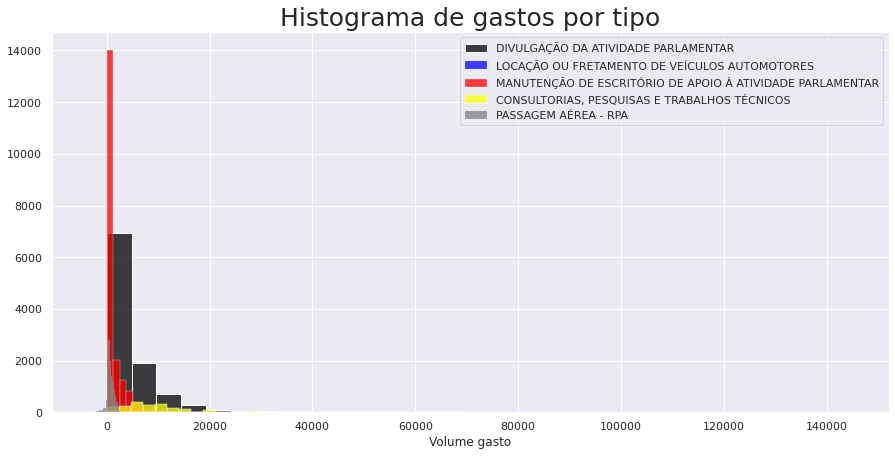

In [167]:
sns.set_style("darkgrid")
ax0 = sns.histplot(dfGastosDep.query('txtDescricao == "DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR."')['vlrLiquido'], kde=False, bins=30, color='#000000', label='DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR')
sns.histplot(dfGastosDep.query('txtDescricao == "LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES"')['vlrLiquido'], kde=False, bins=30, color='blue', label='LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES')
sns.histplot(dfGastosDep.query('txtDescricao == "MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR"')['vlrLiquido'], kde=False, bins=30, color='red', label='MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR')
sns.histplot(dfGastosDep.query('txtDescricao == "CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS."')['vlrLiquido'], kde=False, bins=30, color='yellow', label='CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS')
sns.histplot(dfGastosDep.query('txtDescricao == "PASSAGEM AÉREA - RPA"')['vlrLiquido'], kde=False, bins=30, color='gray', label='PASSAGEM AÉREA - RPA ')
ax0.set_title('Histograma de gastos por tipo', {'fontsize' : 25})
ax0.figure.set_size_inches(15, 7)
ax0.set_xlabel('Volume gasto')
ax0.set_ylabel('')
ax0.legend()

Text(0.5, 1.0, 'Box dos gastos por tipo')

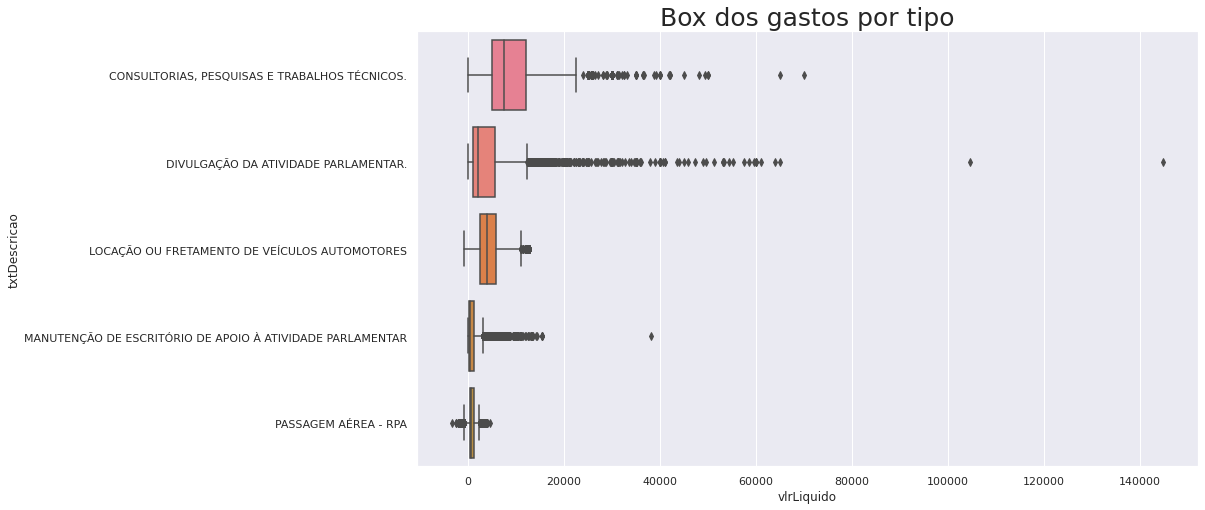

In [168]:
sns.set_style('darkgrid')

tiposGastos = ['DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.', 'LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES', 'MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR', 'CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.', 'PASSAGEM AÉREA - RPA']
tiposGastos.sort()
ax = sns.boxplot(x = 'vlrLiquido', y = 'txtDescricao', data=dfGastosDep,
                 order = tiposGastos, palette=sns.color_palette(palette="husl", n_colors=30, desat=None), orient='h')

ax.figure.set_size_inches(14, 8)
ax.set_title('Box dos gastos por tipo', fontsize=25)

Text(0.5, 1.0, 'Box dos gastos por partido - DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR')

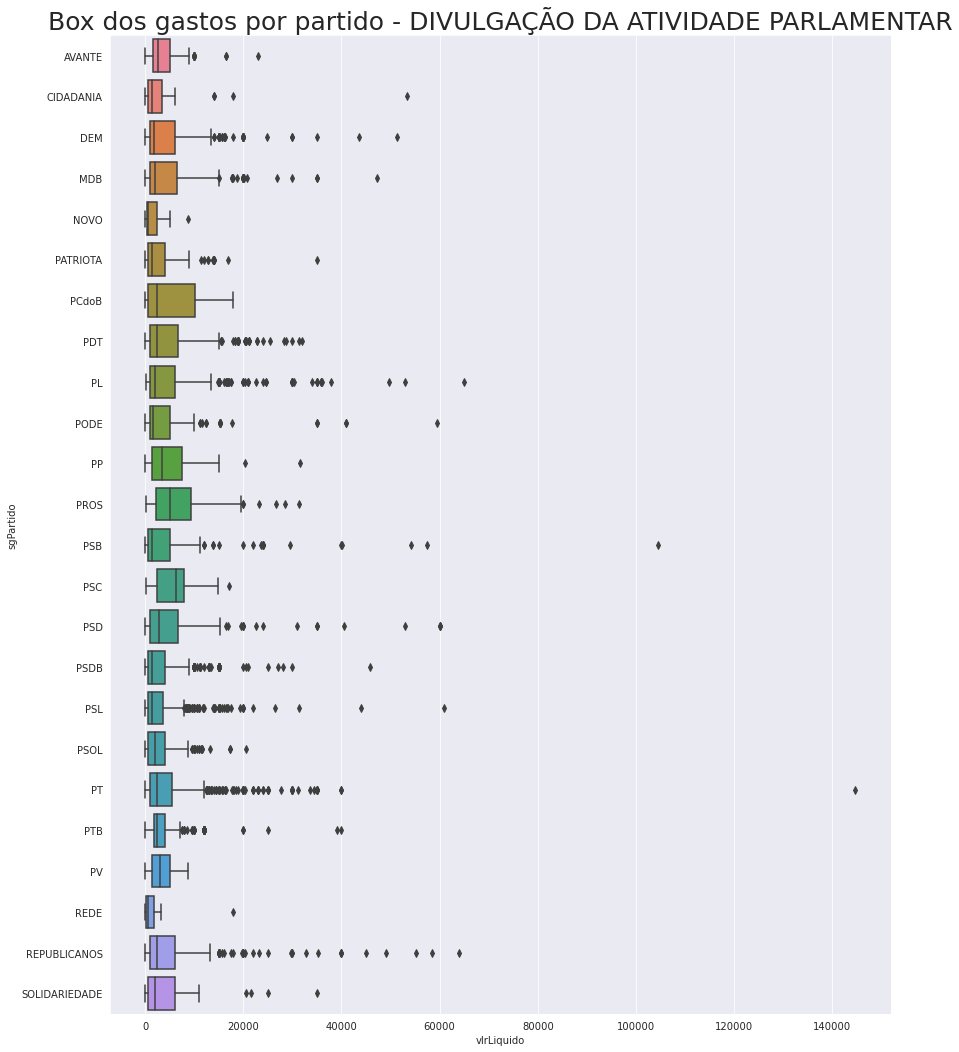

In [119]:
sns.set_style('darkgrid')
partidos = ['PSDB', 'DEM', 'PP', 'PDT', 'PODE', 'PSB', 'PT',
       'REPUBLICANOS', 'CIDADANIA', 'PSOL', 'MDB', 'PSD', 'PCdoB', 'PL',
       'PTB', 'PROS', 'PSC', 'PSL', 'SOLIDARIEDADE', 'NOVO', 'AVANTE',
       'PATRIOTA', 'PV', 'REDE']                   
partidos.sort()
ax = sns.boxplot(x = 'vlrLiquido', y = 'sgPartido', data=dfGastosDep.query('datEmissao >= "01/01/2020" and txtDescricao == "DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR."'),
                 order = partidos, palette=sns.color_palette(palette="husl", n_colors=30, desat=None), orient='h')

ax.figure.set_size_inches(14, 18)
ax.set_title('Box dos gastos por partido - DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR', fontsize=25)

Text(0.5, 1.0, 'Box dos gastos por partido - LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES')

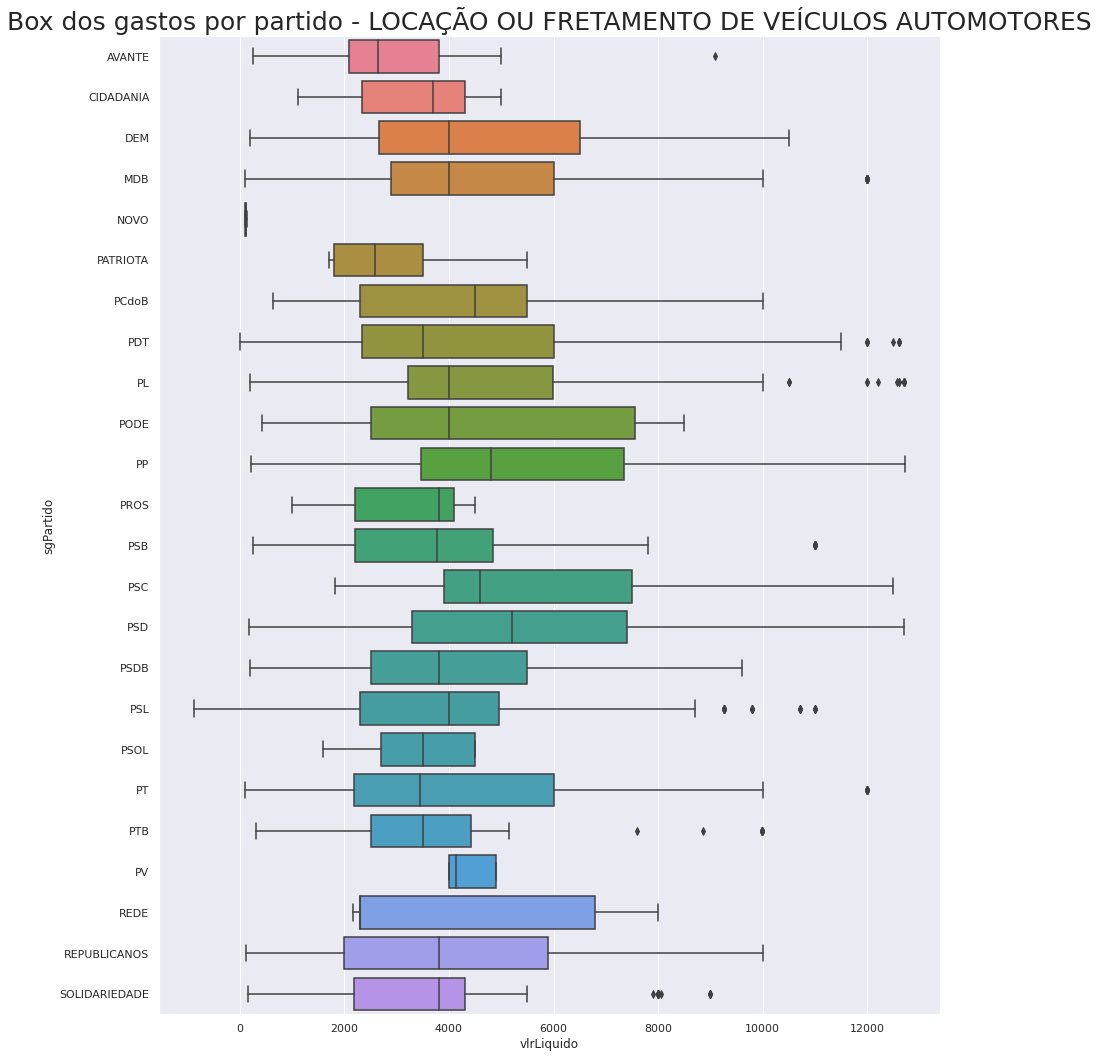

In [234]:
sns.set_style('darkgrid')
partidos = ['PSDB', 'DEM', 'PP', 'PDT', 'PODE', 'PSB', 'PT',
       'REPUBLICANOS', 'CIDADANIA', 'PSOL', 'MDB', 'PSD', 'PCdoB', 'PL',
       'PTB', 'PROS', 'PSC', 'PSL', 'SOLIDARIEDADE', 'NOVO', 'AVANTE',
       'PATRIOTA', 'PV', 'REDE']                   
partidos.sort()
ax = sns.boxplot(x = 'vlrLiquido', y = 'sgPartido', data=dfGastosDep.query('txtDescricao == "LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES"'),
                 order = partidos, palette=sns.color_palette(palette="husl", n_colors=30, desat=None), orient='h', )

ax.figure.set_size_inches(14, 18)
ax.set_title('Box dos gastos por partido - LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES', fontsize=25)

Text(0.5, 1.0, 'Box dos gastos por partido - MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR')

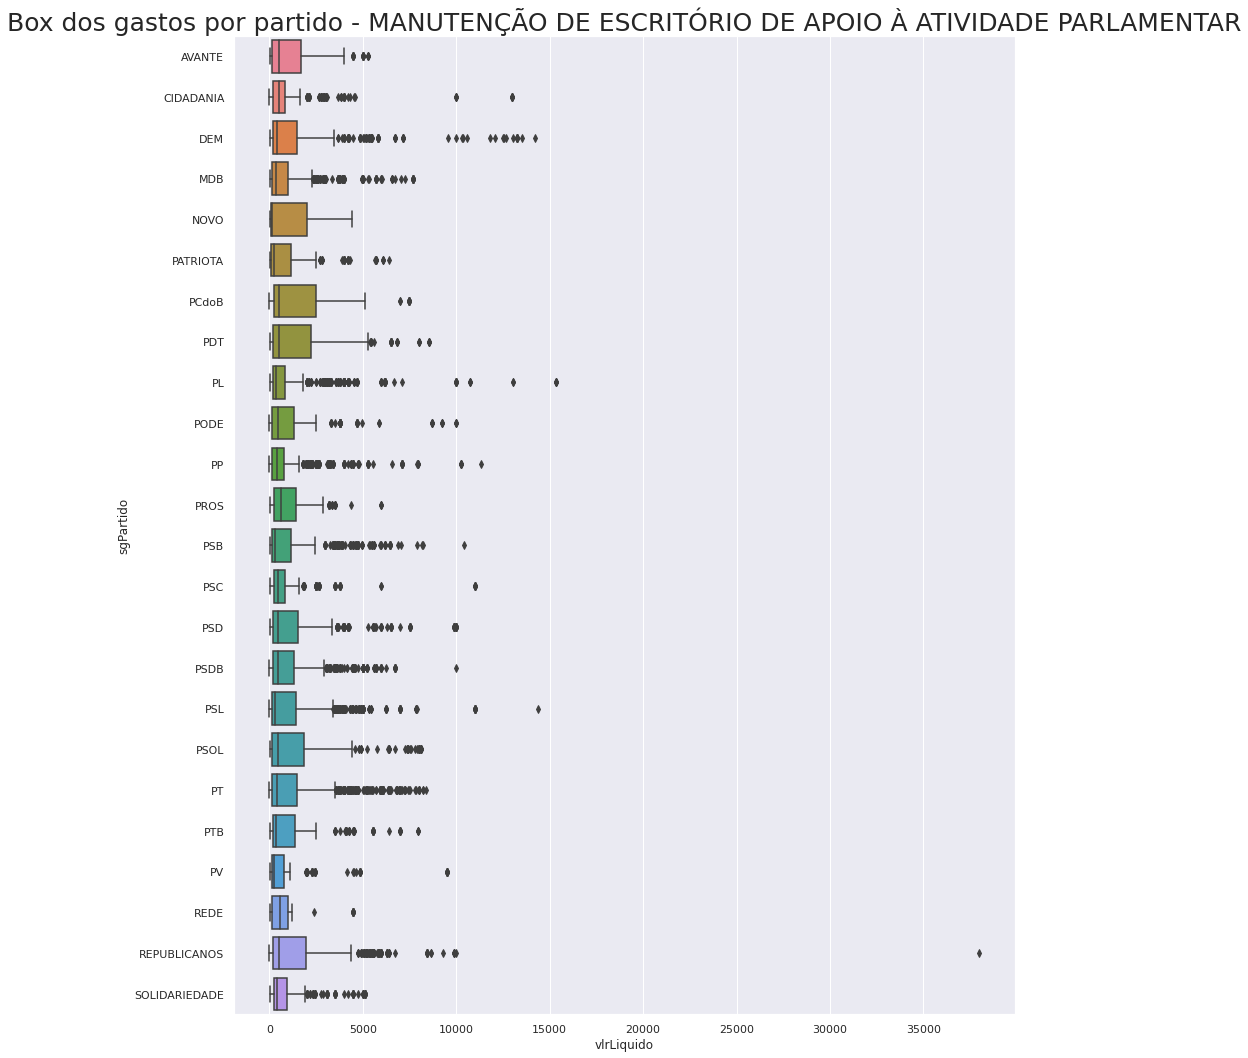

In [235]:
sns.set_style('darkgrid')
partidos = ['PSDB', 'DEM', 'PP', 'PDT', 'PODE', 'PSB', 'PT',
       'REPUBLICANOS', 'CIDADANIA', 'PSOL', 'MDB', 'PSD', 'PCdoB', 'PL',
       'PTB', 'PROS', 'PSC', 'PSL', 'SOLIDARIEDADE', 'NOVO', 'AVANTE',
       'PATRIOTA', 'PV', 'REDE']                   
partidos.sort()
ax = sns.boxplot(x = 'vlrLiquido', y = 'sgPartido', data=dfGastosDep.query('datEmissao >= "01/01/2020" and txtDescricao == "MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR"'),
                 order = partidos, palette=sns.color_palette(palette="husl", n_colors=30, desat=None), orient='h', )

ax.figure.set_size_inches(14, 18)
ax.set_title('Box dos gastos por partido - MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR', fontsize=25)

Text(0.5, 1.0, 'Box dos gastos por partido - CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS')

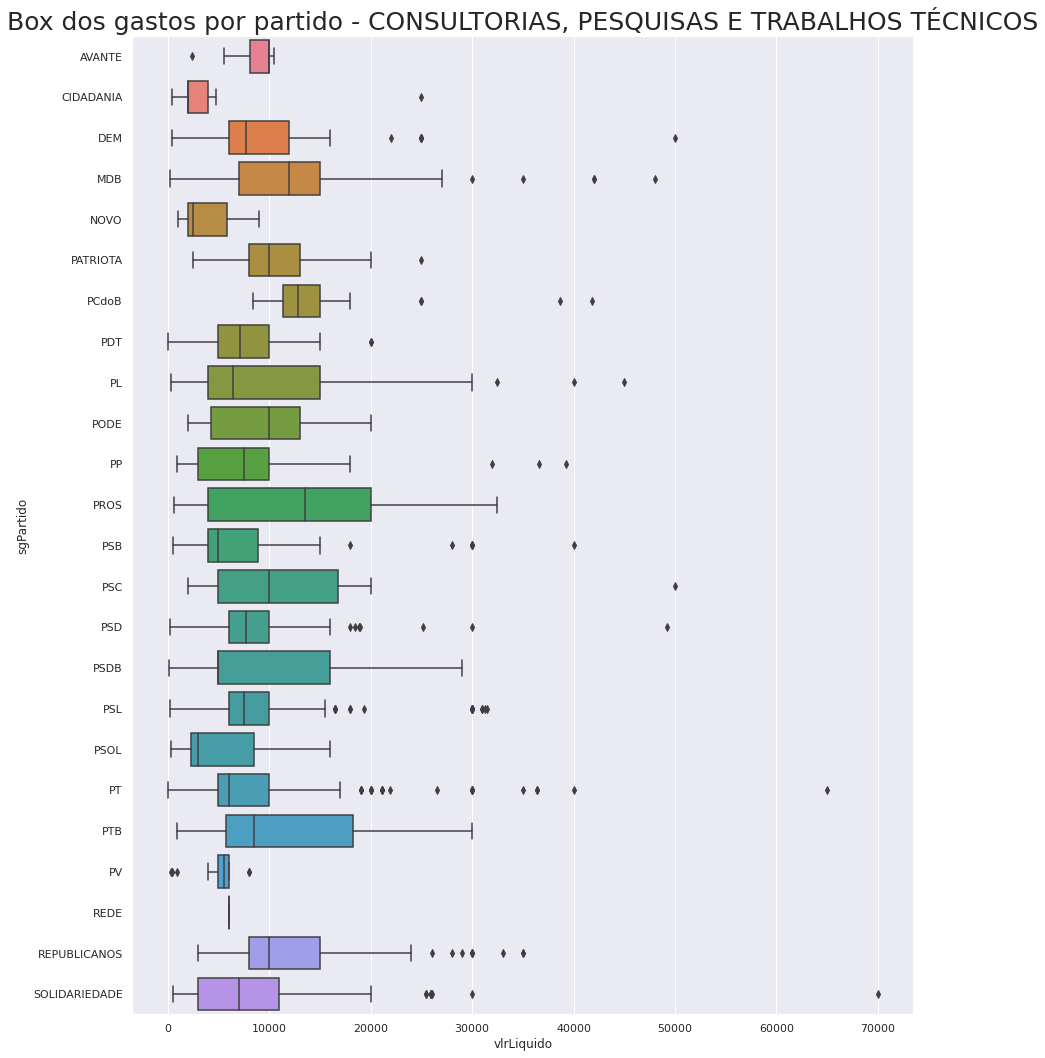

In [236]:
sns.set_style('darkgrid')
partidos = ['PSDB', 'DEM', 'PP', 'PDT', 'PODE', 'PSB', 'PT',
       'REPUBLICANOS', 'CIDADANIA', 'PSOL', 'MDB', 'PSD', 'PCdoB', 'PL',
       'PTB', 'PROS', 'PSC', 'PSL', 'SOLIDARIEDADE', 'NOVO', 'AVANTE',
       'PATRIOTA', 'PV', 'REDE']                   
partidos.sort()
ax = sns.boxplot(x = 'vlrLiquido', y = 'sgPartido', data=dfGastosDep.query('txtDescricao == "CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS."'),
                 order = partidos, palette=sns.color_palette(palette="husl", n_colors=30, desat=None), orient='h', )

ax.figure.set_size_inches(14, 18)
ax.set_title('Box dos gastos por partido - CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS', fontsize=25)

In [216]:
dfGastosDepX = dfGastosDep[['txNomeParlamentar', 'sgUF', 'sgPartido', 'txtDescricao','datEmissao', 'vlrDocumento', 'numMes']]

In [217]:
dfGastosDepX = dfGastosDepX.dropna()

Text(0.5, 1.0, 'Distribuição dos gastos por partido - em 2020')

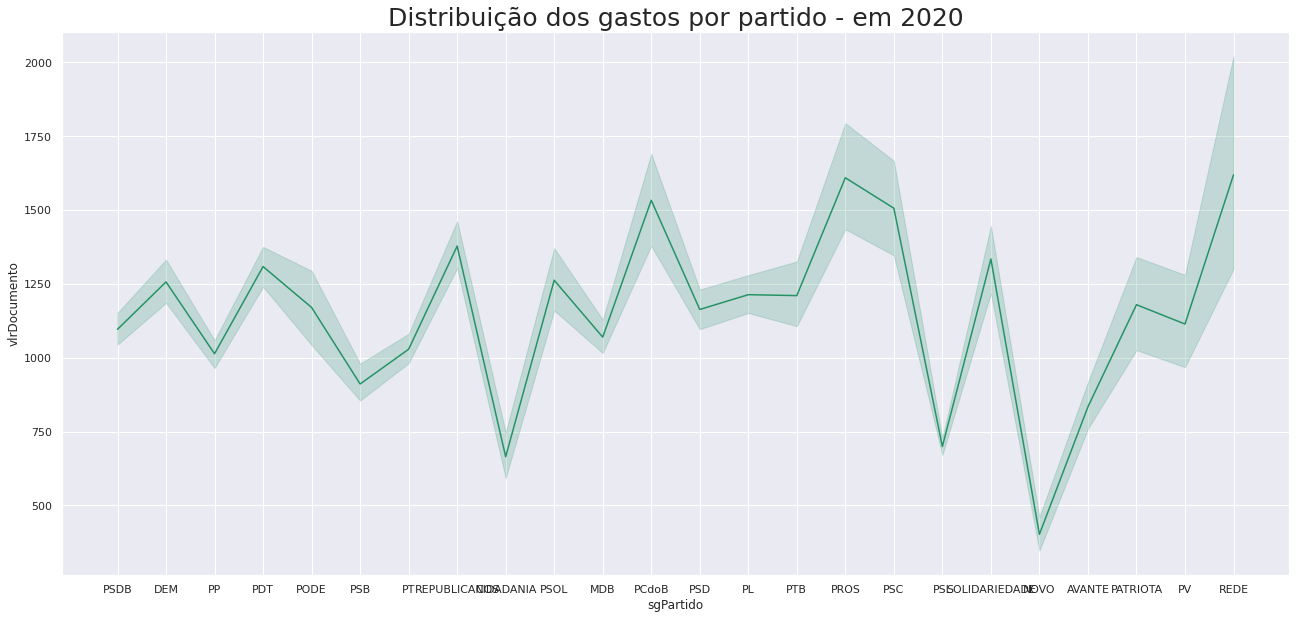

In [218]:
sns.set_style(style='darkgrid')
px = sns.lineplot(data=dfGastosDepX, x=dfGastosDepX.sgPartido, 
                  y='vlrDocumento', hue_order=partidos)
px.figure.set_size_inches(22,10)
px.set_title('Distribuição dos gastos por partido - em 2020', fontsize=25)

In [148]:
principaisGastos = ['DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.', 'LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES', 'MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR', 'CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.', 'PASSAGEM AÉREA - RPA', 'COMBUSTÍVEIS E LUBRIFICANTES.']

In [86]:
dfGastosDepX

,txNomeParlamentar,sgUF,sgPartido,txtDescricao,datEmissao,vlrDocumento,numMes,numAno
343,Danilo Forte,CE,PSDB,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,2020-08-03T00:00:00,400.00,7,2020
344,Danilo Forte,CE,PSDB,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,2020-09-01T00:00:00,400.00,8,2020
345,Danilo Forte,CE,PSDB,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,2020-10-01T00:00:00,400.00,9,2020
346,Danilo Forte,CE,PSDB,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,2020-07-21T00:00:00,43.30,7,2020
347,Danilo Forte,CE,PSDB,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,2020-07-22T00:00:00,104.50,7,2020
...,...,...,...,...,...,...,...,...
129336,Jorge Goetten,SC,PL,PASSAGEM AÉREA - RPA,2020-10-08T00:00:00,886.27,10,2020
129337,Jorge Goetten,SC,PL,PASSAGEM AÉREA - RPA,2020-10-08T00:00:00,859.47,10,2020
129338,Jorge Goetten,SC,PL,PASSAGEM AÉREA - RPA,2020-10-07T00:00:00,1530.47,10,2020
129339,Jorge Goetten,SC,PL,PASSAGEM AÉREA - RPA,2020-10-08T00:00:00,862.27,10,2020


Text(0.5, 1.0, 'Valor gasto por mês')

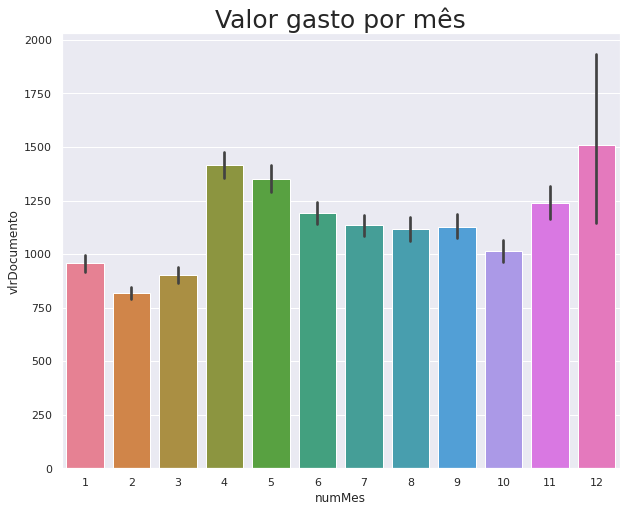

In [258]:
sns.set_style('darkgrid')
ax = sns.barplot(x=dfGastosDepX.numMes, y= dfGastosDepX.vlrDocumento,
             palette=sns.color_palette(palette="husl", n_colors=12, desat=None))
ax.figure.set_size_inches(10, 8)
ax.set_title('Valor gasto por mês', fontsize=25)

Text(0.5, 1.0, 'Valor gasto por mês - CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS')

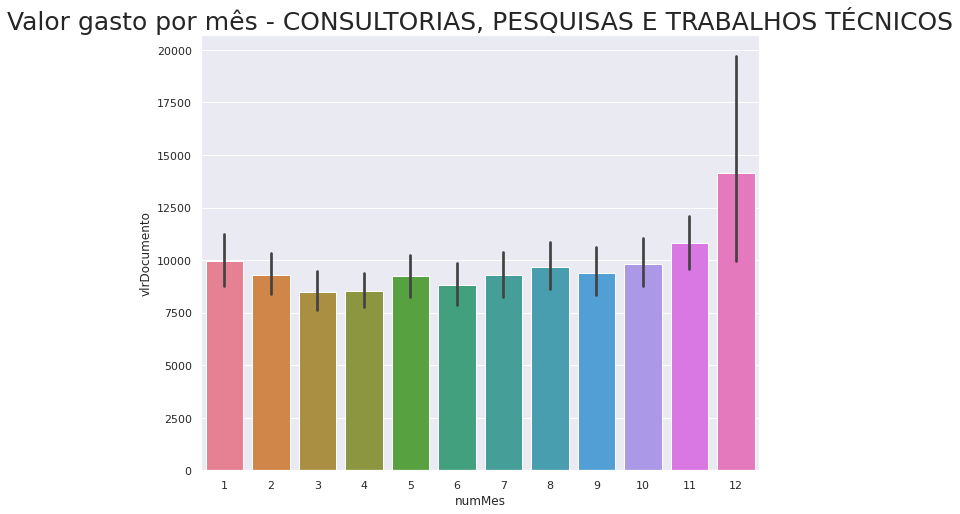

In [257]:
sns.set_style('darkgrid')
ax = sns.barplot(x=dfGastosDepX.query('txtDescricao == "CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS."')['numMes'], y= dfGastosDepX.query('txtDescricao == "CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS."')['vlrDocumento'],
             palette=sns.color_palette(palette="husl", n_colors=12, desat=None))
ax.figure.set_size_inches(10, 8)
ax.set_title('Valor gasto por mês - CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS', fontsize=25)

Text(0.5, 1.0, 'Valor gasto por mês - DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR')

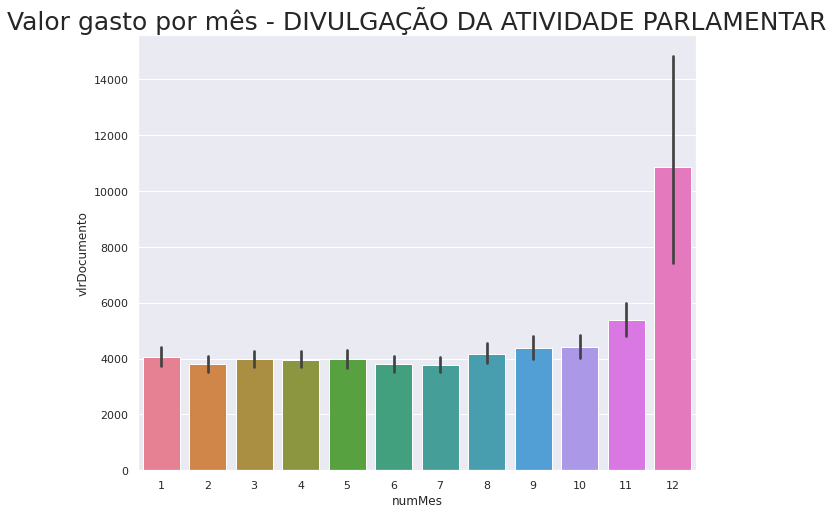

In [256]:
sns.set_style('darkgrid')
ax = sns.barplot(x=dfGastosDepX.query('txtDescricao == "DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR."')['numMes'], y= dfGastosDepX.query('txtDescricao == "DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR."')['vlrDocumento'],
             palette=sns.color_palette(palette="husl", n_colors=12, desat=None))
ax.figure.set_size_inches(10, 8)
ax.set_title('Valor gasto por mês - DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR', fontsize=25)

Text(0.5, 1.0, 'Valor gasto por mês - LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES')

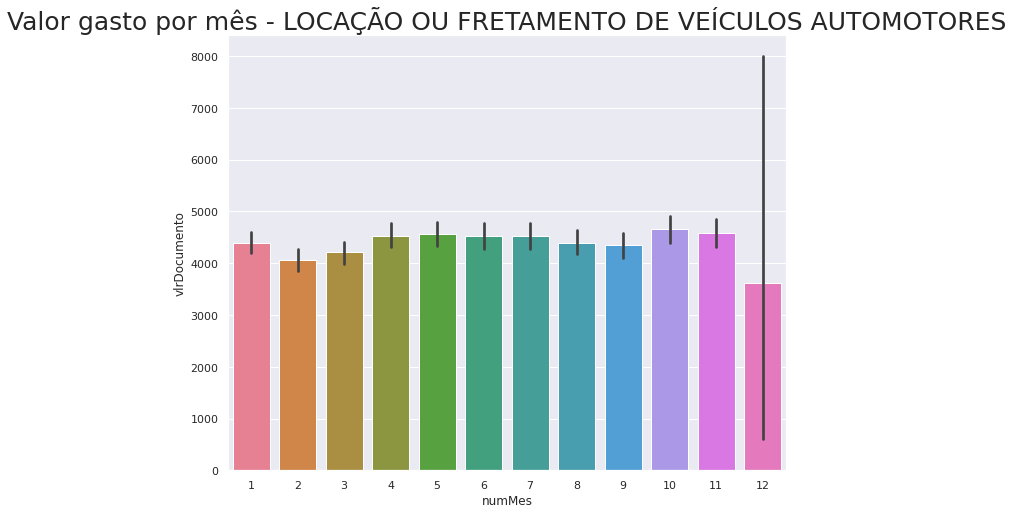

In [255]:
sns.set_style('darkgrid')
ax = sns.barplot(x=dfGastosDepX.query('txtDescricao == "LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES"')['numMes'], y= dfGastosDepX.query('txtDescricao == "LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES"')['vlrDocumento'],
             palette=sns.color_palette(palette="husl", n_colors=12, desat=None))
ax.figure.set_size_inches(10, 8)
ax.set_title('Valor gasto por mês - LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES', fontsize=25)

Text(0.5, 1.0, 'Valor gasto por mês - MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR')

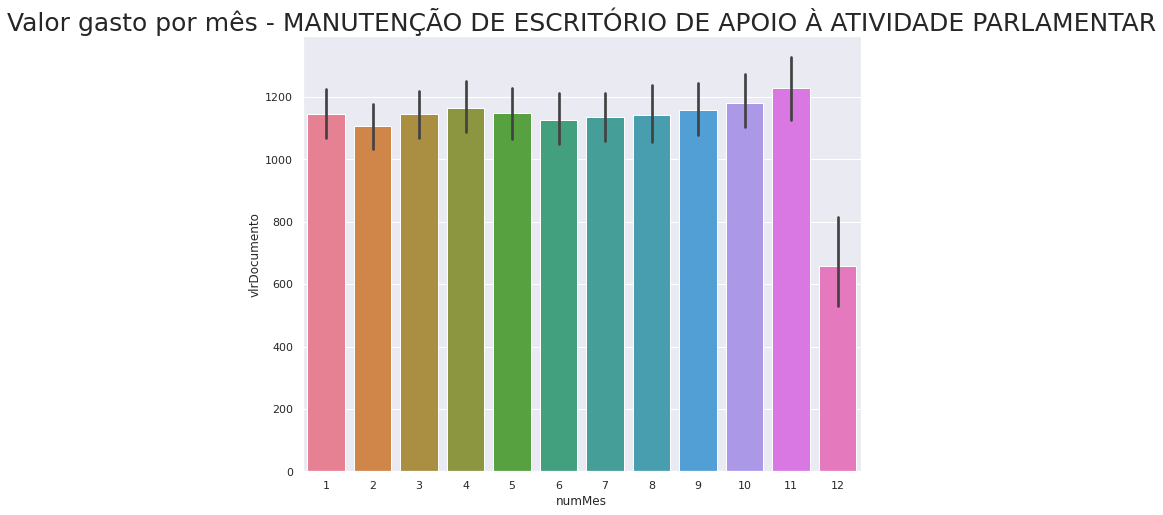

In [254]:
sns.set_style('darkgrid')
ax = sns.barplot(x=dfGastosDepX.query('txtDescricao == "MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR"')['numMes'], y= dfGastosDepX.query('txtDescricao == "MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR"')['vlrDocumento'],
             palette=sns.color_palette(palette="husl", n_colors=12, desat=None))
ax.figure.set_size_inches(10, 8)
ax.set_title('Valor gasto por mês - MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR', fontsize=25)

Text(0.5, 1.0, 'Valor gasto por mês - PASSAGEM AÉREA - RPA')

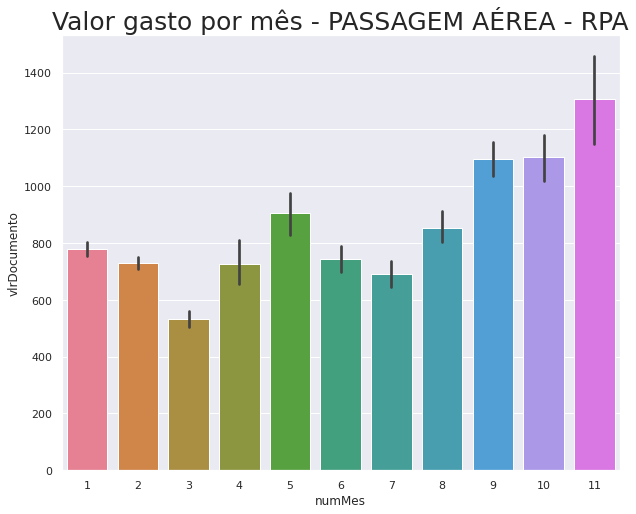

In [253]:
sns.set_style('darkgrid')
ax = sns.barplot(x=dfGastosDepX.query('txtDescricao == "PASSAGEM AÉREA - RPA"')['numMes'], y= dfGastosDepX.query('txtDescricao == "PASSAGEM AÉREA - RPA"')['vlrDocumento'],
             palette=sns.color_palette(palette="husl", n_colors=12, desat=None))
ax.figure.set_size_inches(10, 8)
ax.set_title('Valor gasto por mês - PASSAGEM AÉREA - RPA', fontsize=25)

Text(0.5, 1.0, 'Campeões gastos em novembro - PASSAGEM AÉREA')

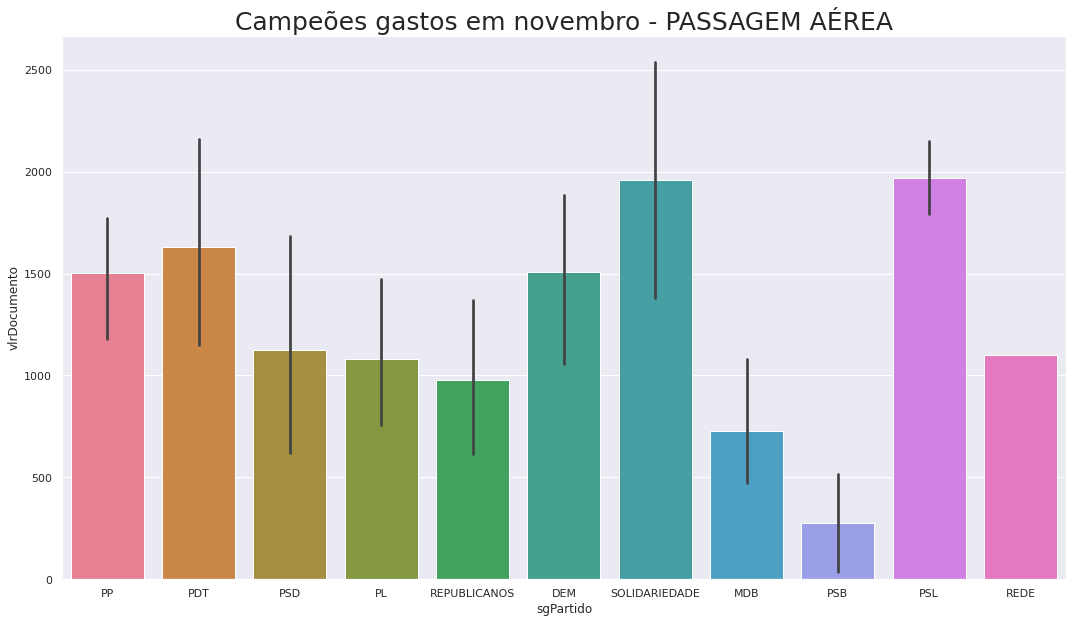

In [252]:
sns.set_style('darkgrid')
ax = sns.barplot(x=dfGastosDepX.query('txtDescricao == "PASSAGEM AÉREA - RPA" and numMes == 11')['sgPartido'], 
                 y= dfGastosDepX.query('txtDescricao == "PASSAGEM AÉREA - RPA" and numMes == 11')['vlrDocumento'],
             palette=sns.color_palette(palette="husl", n_colors=11, desat=None))
ax.figure.set_size_inches(18, 10)
ax.set_title('Campeões gastos em novembro - PASSAGEM AÉREA', fontsize=25)

In [248]:
dfGastosDepX.query('txtDescricao == "PASSAGEM AÉREA - RPA" and numMes == 11')[['vlrDocumento']].groupby(dfGastosDepX.sgPartido).sum().sort_values(by='vlrDocumento',ascending=False)

,vlrDocumento
sgPartido,
PP,21031.87
PDT,14684.84
PL,14035.90
PSL,11827.01
REPUBLICANOS,10779.27
DEM,9048.80
PSD,6751.82
SOLIDARIEDADE,3922.33
MDB,2903.02


In [ ]:
sns.set_style('darkgrid')
ax = sns.barplot(x=dfGastosDepX.query('txtDescricao == "LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES" and numMes == 12')['sgPartido'], 
                 y= dfGastosDepX.query('txtDescricao == "LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES" and numMes == 12')['vlrDocumento'],
             palette=sns.color_palette(palette="husl", n_colors=12, desat=None))
ax.figure.set_size_inches(6, 4)
ax.set_yticks([x for x in range(19)])
ax.set_title('Campeões gastos em dezembro - LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES', fontsize=25)

In [ ]:
dfGastosDepX.query('txtDescricao == "LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES" and numMes == 12')[['sgPartido']].groupby(dfGastosDepX.vlrDocumento).sum()

In [219]:
y = pd.get_dummies(dfGastosDepX.sgPartido, prefix='sgPartido')
y

,sgPartido_AVANTE,sgPartido_CIDADANIA,sgPartido_DEM,sgPartido_MDB,sgPartido_NOVO,sgPartido_PATRIOTA,sgPartido_PCdoB,sgPartido_PDT,sgPartido_PL,sgPartido_PODE,...,sgPartido_PSD,sgPartido_PSDB,sgPartido_PSL,sgPartido_PSOL,sgPartido_PT,sgPartido_PTB,sgPartido_PV,sgPartido_REDE,sgPartido_REPUBLICANOS,sgPartido_SOLIDARIEDADE
343,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
344,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
345,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
346,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
347,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129336,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
129337,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
129338,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
129339,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [220]:
y.columns

Index(['sgPartido_AVANTE', 'sgPartido_CIDADANIA', 'sgPartido_DEM',
       'sgPartido_MDB', 'sgPartido_NOVO', 'sgPartido_PATRIOTA',
       'sgPartido_PCdoB', 'sgPartido_PDT', 'sgPartido_PL', 'sgPartido_PODE',
       'sgPartido_PP', 'sgPartido_PROS', 'sgPartido_PSB', 'sgPartido_PSC',
       'sgPartido_PSD', 'sgPartido_PSDB', 'sgPartido_PSL', 'sgPartido_PSOL',
       'sgPartido_PT', 'sgPartido_PTB', 'sgPartido_PV', 'sgPartido_REDE',
       'sgPartido_REPUBLICANOS', 'sgPartido_SOLIDARIEDADE'],
      dtype='object')

In [226]:
z = pd.get_dummies(dfGastosDepX.txtDescricao, prefix='txtDescricao')
z

,txtDescricao_ASSINATURA DE PUBLICAÇÕES,txtDescricao_COMBUSTÍVEIS E LUBRIFICANTES.,"txtDescricao_CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",txtDescricao_DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,txtDescricao_FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,"txtDescricao_HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO FEDERAL.",txtDescricao_LOCAÇÃO OU FRETAMENTO DE AERONAVES,txtDescricao_LOCAÇÃO OU FRETAMENTO DE EMBARCAÇÕES,txtDescricao_LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES,txtDescricao_MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR,"txtDescricao_PARTICIPAÇÃO EM CURSO, PALESTRA OU EVENTO SIMILAR",txtDescricao_PASSAGEM AÉREA - REEMBOLSO,txtDescricao_PASSAGEM AÉREA - RPA,txtDescricao_PASSAGEM AÉREA - SIGEPA,"txtDescricao_PASSAGENS TERRESTRES, MARÍTIMAS OU FLUVIAIS",txtDescricao_SERVIÇO DE SEGURANÇA PRESTADO POR EMPRESA ESPECIALIZADA.,"txtDescricao_SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO",txtDescricao_SERVIÇOS POSTAIS,txtDescricao_TELEFONIA
343,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
344,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
345,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
346,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
347,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129336,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
129337,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
129338,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
129339,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [227]:
z.columns

Index(['txtDescricao_ASSINATURA DE PUBLICAÇÕES',
       'txtDescricao_COMBUSTÍVEIS E LUBRIFICANTES.',
       'txtDescricao_CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.',
       'txtDescricao_DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.',
       'txtDescricao_FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR',
       'txtDescricao_HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO FEDERAL.',
       'txtDescricao_LOCAÇÃO OU FRETAMENTO DE AERONAVES',
       'txtDescricao_LOCAÇÃO OU FRETAMENTO DE EMBARCAÇÕES',
       'txtDescricao_LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES',
       'txtDescricao_MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR',
       'txtDescricao_PARTICIPAÇÃO EM CURSO, PALESTRA OU EVENTO SIMILAR',
       'txtDescricao_PASSAGEM AÉREA - REEMBOLSO',
       'txtDescricao_PASSAGEM AÉREA - RPA',
       'txtDescricao_PASSAGEM AÉREA - SIGEPA',
       'txtDescricao_PASSAGENS TERRESTRES, MARÍTIMAS OU FLUVIAIS',
       'txtDescricao_SERVIÇO DE SEGURANÇA PRESTADO POR EMPRESA ESPECIALIZADA

In [221]:
dfGastosDepX[['sgPartido_AVANTE', 'sgPartido_CIDADANIA', 'sgPartido_DEM',
       'sgPartido_MDB', 'sgPartido_NOVO', 'sgPartido_PATRIOTA',
       'sgPartido_PCdoB', 'sgPartido_PDT', 'sgPartido_PL', 'sgPartido_PODE',
       'sgPartido_PP', 'sgPartido_PROS', 'sgPartido_PSB', 'sgPartido_PSC',
       'sgPartido_PSD', 'sgPartido_PSDB', 'sgPartido_PSL', 'sgPartido_PSOL',
       'sgPartido_PT', 'sgPartido_PTB', 'sgPartido_PV', 'sgPartido_REDE',
       'sgPartido_REPUBLICANOS', 'sgPartido_SOLIDARIEDADE']] = y

In [228]:
dfGastosDepX[['txtDescricao_ASSINATURA DE PUBLICAÇÕES',
       'txtDescricao_COMBUSTÍVEIS E LUBRIFICANTES.',
       'txtDescricao_CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.',
       'txtDescricao_DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.',
       'txtDescricao_FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR',
       'txtDescricao_HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO FEDERAL.',
       'txtDescricao_LOCAÇÃO OU FRETAMENTO DE AERONAVES',
       'txtDescricao_LOCAÇÃO OU FRETAMENTO DE EMBARCAÇÕES',
       'txtDescricao_LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES',
       'txtDescricao_MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR',
       'txtDescricao_PARTICIPAÇÃO EM CURSO, PALESTRA OU EVENTO SIMILAR',
       'txtDescricao_PASSAGEM AÉREA - REEMBOLSO',
       'txtDescricao_PASSAGEM AÉREA - RPA',
       'txtDescricao_PASSAGEM AÉREA - SIGEPA',
       'txtDescricao_PASSAGENS TERRESTRES, MARÍTIMAS OU FLUVIAIS',
       'txtDescricao_SERVIÇO DE SEGURANÇA PRESTADO POR EMPRESA ESPECIALIZADA.',
       'txtDescricao_SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO',
       'txtDescricao_SERVIÇOS POSTAIS', 'txtDescricao_TELEFONIA']] = z

In [230]:
dfGastosDepX

,txNomeParlamentar,sgUF,sgPartido,txtDescricao,datEmissao,vlrDocumento,numMes,sgPartido_AVANTE,sgPartido_CIDADANIA,sgPartido_DEM,...,txtDescricao_MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR,"txtDescricao_PARTICIPAÇÃO EM CURSO, PALESTRA OU EVENTO SIMILAR",txtDescricao_PASSAGEM AÉREA - REEMBOLSO,txtDescricao_PASSAGEM AÉREA - RPA,txtDescricao_PASSAGEM AÉREA - SIGEPA,"txtDescricao_PASSAGENS TERRESTRES, MARÍTIMAS OU FLUVIAIS",txtDescricao_SERVIÇO DE SEGURANÇA PRESTADO POR EMPRESA ESPECIALIZADA.,"txtDescricao_SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO",txtDescricao_SERVIÇOS POSTAIS,txtDescricao_TELEFONIA
343,Danilo Forte,CE,PSDB,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,2020-08-03T00:00:00,400.00,7,0,0,0,...,1,0,0,0,0,0,0,0,0,0
344,Danilo Forte,CE,PSDB,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,2020-09-01T00:00:00,400.00,8,0,0,0,...,1,0,0,0,0,0,0,0,0,0
345,Danilo Forte,CE,PSDB,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,2020-10-01T00:00:00,400.00,9,0,0,0,...,1,0,0,0,0,0,0,0,0,0
346,Danilo Forte,CE,PSDB,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,2020-07-21T00:00:00,43.30,7,0,0,0,...,1,0,0,0,0,0,0,0,0,0
347,Danilo Forte,CE,PSDB,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,2020-07-22T00:00:00,104.50,7,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129336,Jorge Goetten,SC,PL,PASSAGEM AÉREA - REEMBOLSO,2020-10-08T00:00:00,886.27,10,0,0,0,...,0,0,1,0,0,0,0,0,0,0
129337,Jorge Goetten,SC,PL,PASSAGEM AÉREA - REEMBOLSO,2020-10-08T00:00:00,859.47,10,0,0,0,...,0,0,1,0,0,0,0,0,0,0
129338,Jorge Goetten,SC,PL,PASSAGEM AÉREA - REEMBOLSO,2020-10-07T00:00:00,1530.47,10,0,0,0,...,0,0,1,0,0,0,0,0,0,0
129339,Jorge Goetten,SC,PL,PASSAGEM AÉREA - REEMBOLSO,2020-10-08T00:00:00,862.27,10,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [231]:
pearson = dfGastosDepX.corr()
pearson

,vlrDocumento,numMes,sgPartido_AVANTE,sgPartido_CIDADANIA,sgPartido_DEM,sgPartido_MDB,sgPartido_NOVO,sgPartido_PATRIOTA,sgPartido_PCdoB,sgPartido_PDT,...,txtDescricao_MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR,"txtDescricao_PARTICIPAÇÃO EM CURSO, PALESTRA OU EVENTO SIMILAR",txtDescricao_PASSAGEM AÉREA - REEMBOLSO,txtDescricao_PASSAGEM AÉREA - RPA,txtDescricao_PASSAGEM AÉREA - SIGEPA,"txtDescricao_PASSAGENS TERRESTRES, MARÍTIMAS OU FLUVIAIS",txtDescricao_SERVIÇO DE SEGURANÇA PRESTADO POR EMPRESA ESPECIALIZADA.,"txtDescricao_SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO",txtDescricao_SERVIÇOS POSTAIS,txtDescricao_TELEFONIA
vlrDocumento,1.000000,0.034067,-0.011922,-0.019753,0.015290,-0.000090,-0.025293,0.004308,0.019260,0.020160,...,0.011678,0.007500,-0.000772,-0.040489,-0.002630,-0.015744,0.013313,-0.128840,-0.080086,-0.082626
numMes,0.034067,1.000000,0.005790,-0.008846,0.010077,0.001440,-0.006586,-0.004011,0.005602,0.001689,...,0.026221,-0.006022,0.008146,-0.222920,-0.007432,-0.020047,0.002423,-0.001340,-0.006709,-0.005344
sgPartido_AVANTE,-0.011922,0.005790,1.000000,-0.018256,-0.030835,-0.037613,-0.014195,-0.014838,-0.015626,-0.031782,...,-0.020545,0.007637,-0.008060,0.021892,-0.002997,0.019333,-0.009102,0.028193,-0.009859,-0.012047
sgPartido_CIDADANIA,-0.019753,-0.008846,-0.018256,1.000000,-0.029808,-0.036361,-0.013722,-0.014344,-0.015106,-0.030724,...,0.023620,-0.000924,-0.008223,0.002990,0.002766,-0.005933,0.001498,0.012548,-0.006096,0.013187
sgPartido_DEM,0.015290,0.010077,-0.030835,-0.029808,1.000000,-0.061413,-0.023177,-0.024227,-0.025514,-0.051892,...,-0.006169,-0.001560,-0.015102,0.012487,-0.004894,-0.007482,0.000012,-0.038438,0.012381,0.003644
sgPartido_MDB,-0.000090,0.001440,-0.037613,-0.036361,-0.061413,1.000000,-0.028272,-0.029553,-0.031123,-0.063299,...,-0.000569,0.002648,-0.018058,0.008457,0.008548,-0.006543,0.004428,-0.050112,0.007394,0.017861
sgPartido_NOVO,-0.025293,-0.006586,-0.014195,-0.013722,-0.023177,-0.028272,1.000000,-0.011153,-0.011746,-0.023889,...,-0.023835,-0.000718,0.142805,-0.021470,-0.002253,0.004232,-0.006842,0.125628,-0.022686,-0.026992
sgPartido_PATRIOTA,0.004308,-0.004011,-0.014838,-0.014344,-0.024227,-0.029553,-0.011153,1.000000,-0.012278,-0.024971,...,0.011475,-0.000751,-0.007822,-0.023827,0.011499,0.010425,0.004298,0.022676,0.008814,-0.009835
sgPartido_PCdoB,0.019260,0.005602,-0.015626,-0.015106,-0.025514,-0.031123,-0.011746,-0.012278,1.000000,-0.026298,...,0.017655,-0.000791,-0.006777,-0.004045,-0.002480,-0.005078,-0.007532,-0.028907,0.003201,0.016463
sgPartido_PDT,0.020160,0.001689,-0.031782,-0.030724,-0.051892,-0.063299,-0.023889,-0.024971,-0.026298,1.000000,...,-0.010847,-0.001608,-0.015420,0.006382,-0.005044,-0.008681,0.019195,-0.026587,-0.004933,0.007768
